In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
filepath = '../data/cell_tracks/'

## This is the preprocessing pipeline for both the macrophage cell tracks 
The below code should preprocess the data before it is ready to be run in the inference pipeline. It does this by the following steps:
1. Loads the csv files holding the cell tracking data
2. Cleans the data on the quality of the cell tracks 
3. Cleans the data dependent on the average length of the cell tracks (i.e. how may timepoints they have)
4. Removes any cell tracks which are outside of the main body of the pupae of the fly 
7. Saves a new csv file which contains the filtered cell tracks for later use in inference pipeline  


In [40]:
# load Macrophage cell tracks
# Control 
df_c1 = pd.read_csv(filepath+'Single_wound/CTR_revision/20240507   Post-W CONTROL  001_Maximum intensity projection_Tracks.csv')  
df_c2 = pd.read_csv(filepath+'Single_wound/CTR_revision/C2-20240508  Post-W CONTROL  003_Maximum intensity projection_Tracks.csv')  
df_c3 = pd.read_csv(filepath+'Single_wound/CTR_revision/C2-20240508  Post-W CONTROL  004_Maximum intensity projection_Tracks.csv') 
df_c4 = pd.read_csv(filepath+'Single_wound/CTR_revision/C2-20240509  Post-W CONTROL  006_Maximum intensity projection_Tracks.csv') 
df_c5 = pd.read_csv(filepath+'Single_wound/CTR_revision/C2-20240510  Post-W CONTROL  007_Maximum intensity projection_Tracks.csv') 
df_c6 = pd.read_csv(filepath+'Single_wound/CTR_revision/C2-20240510  Post-W CONTROL  008_Maximum intensity projection_Tracks.csv') 

# MCR 
df_mcr1 = pd.read_csv(filepath+'Single_wound/MCR_revision/20240424  Post-W MCR  004_Maximum intensity projection_Tracks.csv')
df_mcr2 = pd.read_csv(filepath+'Single_wound/MCR_revision/20240430  Post-W MCR  005_Maximum intensity projection_Tracks.csv')
df_mcr3 = pd.read_csv(filepath+'Single_wound/MCR_revision/20240502  Post-W MCR  008_Maximum intensity projection_Tracks.csv')
df_mcr4 = pd.read_csv(filepath+'Single_wound/MCR_revision/20240503  Post-W MCR  009_Maximum intensity projection_Tracks.csv')
# df_mcr5 = pd.read_csv(filepath+'Single_wound/MCR_revision/C2-20240424  Post-W MCR  003_Maximum intensity projection_Tracks.csv')

# CTR half wound
df_hc1 = pd.read_csv(filepath+'Half_wound/CTR_revision/cropped-20240328   CONTROL  002_Maximum intensity projection_Tracks.csv')  
df_hc2 = pd.read_csv(filepath+'Half_wound/CTR_revision/cropped20240403   CONTROL  004_Maximum intensity projection_Tracks.csv')  
df_hc3 = pd.read_csv(filepath+'Half_wound/CTR_revision/cropped-C2.20240416WCONTROL005_Maximumintensityprojection.czi-C=1.csv') 
df_hc4 = pd.read_csv(filepath+'Half_wound/CTR_revision/cropped-C2.20240417WCONTROL006_Maximumintensityprojection.czi-C=1.csv') 
df_hc5 = pd.read_csv(filepath+'Half_wound/CTR_revision/C2.20240417WCONTROL007_Maximumintensityprojection.czi-C=1.csv') 
df_hc6 = pd.read_csv(filepath+'Half_wound/CTR_revision/C2.20240417WCONTROL008_Maximumintensityprojection.czi-C=1.csv') 

# MCR half wound 
df_hmcr1 = pd.read_csv(filepath+'Half_wound/MCR_revision/C2-41f - 20230425  Post-wound MCR   004_Maximum inten_Tracks.csv')  
df_hmcr2 = pd.read_csv(filepath+'Half_wound/MCR_revision/20230502Post-woundMCR006_Maximuminten.csv')  
df_hmcr3 = pd.read_csv(filepath+'Half_wound/MCR_revision/C2.20240326MCR007_Maximumintensityprojection.czi-C=1.csv') 
df_hmcr4 = pd.read_csv(filepath+'Half_wound/MCR_revision/C2.20240404MCR008_Maximumintensityprojection.czi-C=1.csv') 
df_hmcr5 = pd.read_csv(filepath+'Half_wound/MCR_revision/C2.20240415WMCR010_Maximumintensityprojection.czi-C=1.csv') 
df_hmcr6 = pd.read_csv(filepath+'Half_wound/MCR_revision/C2.20240416WMCR012_Maximumintensityprojection.czi-C=1.csv') 

In [41]:
#list of data frames
list_dfs = [df_c1, df_c2, df_c3, df_c4, df_c5, df_c6, df_mcr1, df_mcr2, df_mcr3, df_mcr4, #, df_mcr5]# single wound
            df_hc1, df_hc2, df_hc3, df_hc4, df_hc5, df_hc6, df_hmcr1, df_hmcr2, df_hmcr3, df_hmcr4, df_hmcr5, df_hmcr6]# half wound

list_dflabels = ["c1", "c2", "c3", "c4", "c5", "c6", "mcr1", "mcr2", "mcr3", "mcr4", #, "mcr5"]# single wound
                    "hc1", "hc2", "hc3", "hc4", "hc5", "hc6", "hmcr1", "hmcr2", "hmcr3", "hmcr4", "hmcr5", "hmcr6"]# half wound
list_woundlocs = [(204, 321), (229, 315), (208, 339), (180, 289), (180, 291), (206, 295),# single wound CTR
                  (184, 326), (191, 291), (225, 329), (194, 320),#, (183, 331)] # single wound MCR
                    (133, 131), (131, 138), (125, 135), (139, 137), (138, 138), (133, 133), # half wound CTR
                    (135, 144), (133, 144), (121, 134), (134, 142), (126, 139), (128, 148)] # half wound MCR
# convert pixel units to microns
pixels2microns = 1.107
list_woundlocs = [(a*pixels2microns, b*pixels2microns) for a, b in list_woundlocs]

In [42]:
# count number of unique tracks
for i, this_df in enumerate(list_dfs):
    print(i, list_dflabels[i], this_df['/particle/#id'].nunique())

0 c1 302
1 c2 294
2 c3 398
3 c4 270
4 c5 269
5 c6 330
6 mcr1 432
7 mcr2 315
8 mcr3 318
9 mcr4 317
10 hc1 204
11 hc2 181
12 hc3 184
13 hc4 159
14 hc5 242
15 hc6 202
16 hmcr1 136
17 hmcr2 167
18 hmcr3 197
19 hmcr4 168
20 hmcr5 138
21 hmcr6 116


In [44]:
# Preprocessing dataframe to make it cleaner to use 
def preprocess(df):
    df.drop(['/@frameInterval/#agg','/@from','/@nTracks/#agg','/@generationDateTime','/particle/detection/@z'], axis = 1, inplace = True)
    df.rename(columns={'/particle/#id': 'Track_ID',
                        '/particle/detection/@t': 't',
                        '/particle/detection/@x': 'x',
                        '/particle/detection/@y': 'y'}, inplace = True)
    return df # not needed if modified in place

# This function takes in our new dataframe, cleans up the labelling of the columns and normalises the tracks so the wound is at 0,0. It also adds a label to the 
# Track_ID so we can keep track of which track belongs to which original dataframe. This is important for running the inference pipeline later. 
def centre_at_zero(df,xw,yw,label):  
    df['x'] = df['x'] - xw
    df['y'] = df['y'] - yw
    df['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(df['x'], df['y'])
    theta = -np.pi / 4
    rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                            [-np.sin(theta), np.cos(theta)]])

    # Apply the rotation to the DataFrame
    rotated_coordinates = np.dot(df[['x', 'y']], rotation_matrix.T)

    # Update the DataFrame with rotated coordinates
    df[['rotate-x', 'rotate-y']] = rotated_coordinates
    df['theta'] = np.arctan2(df['rotate-y'], df['rotate-x'])

    df['Track_ID'] = df['Track_ID'].astype(str)
    df.Track_ID = df.Track_ID + "{}".format(label)  # creates a label for the tracks to be organised by
    return df

In [45]:
list_dfs_filtered = []
for i, this_df in enumerate(list_dfs):
    filtered_df = preprocess(this_df)
    # adjust y position to Python standard from ImageJ # 298.9 for half wounds?
    if i < 10: # single wound
        y_offset = 565.688
    elif (i>= 10)&(i<=21): # half wound (cropped image)
        y_offset = 298.9
    filtered_df['y'] = y_offset - filtered_df['y']
    # Reset times to minutes
    filtered_df['t'] = filtered_df['t']*filtered_df['/@frameInterval'].div(60)
    # centre with respect to wound location
    if isinstance(list_woundlocs[i][0], int) or isinstance(list_woundlocs[i][0], float): #single wound
        filtered_df = centre_at_zero(filtered_df,list_woundlocs[i][0], y_offset - list_woundlocs[i][1], '_'+list_dflabels[i])
    elif isinstance(list_woundlocs[i][0], tuple): #two wounds
        midpoint_btw_wounds = np.mean(list_woundlocs[i], axis=0)
        filtered_df = centre_at_zero(filtered_df,midpoint_btw_wounds[0], y_offset - midpoint_btw_wounds[1], '_'+list_dflabels[i])
    list_dfs_filtered.append(filtered_df)

In [46]:
list_dfs_filtered[0]

,/@frameInterval,/@nTracks,/@spaceUnits,/@timeUnits,/particle/@nSpots,Track_ID,t,x,y,r,rotate-x,rotate-y,theta
0,29.929583,302,micron,sec,45,1_c1,0.000000,282.365138,-158.504439,323.811254,311.741868,87.582740,0.273886
1,29.929583,302,micron,sec,45,1_c1,0.498826,282.529024,-158.781968,324.090053,312.053995,87.502382,0.273387
2,29.929583,302,micron,sec,45,1_c1,0.997653,282.048413,-159.121442,323.837831,311.954196,86.922495,0.271746
3,29.929583,302,micron,sec,45,1_c1,1.496479,281.994471,-158.661848,323.565239,311.591072,87.209334,0.272901
4,29.929583,302,micron,sec,45,1_c1,1.995306,282.018673,-159.676425,324.085009,312.325599,86.509034,0.270209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,29.929583,302,micron,sec,6,301_c1,23.943666,15.256873,-0.791235,15.277377,11.347726,10.228751,0.733584
13070,29.929583,302,micron,sec,6,301_c1,24.442492,13.974205,-0.512170,13.983588,10.243414,9.519096,0.748763
13071,29.929583,302,micron,sec,6,301_c1,24.941319,14.218674,0.130675,14.219274,9.961719,10.146522,0.794588
13072,29.929583,302,micron,sec,2,302_c1,24.442492,-76.041317,7.660353,76.426193,-59.186019,-48.352643,-2.456595


In [47]:
# list_dflabels = ["c1", "c2", "c3", "c4", "c5", "c6", "mcr1", "mcr2", "mcr3", "mcr4", "mcr5"]# single wound
list_dflabels[16:22]

['hmcr1', 'hmcr2', 'hmcr3', 'hmcr4', 'hmcr5', 'hmcr6']

In [48]:
# Save the data to csv for processing the Inference pipeline
singlewound_control_data = pd.concat(list_dfs_filtered[0:6]).reset_index()
singlewound_control_data.to_csv(filepath+'Single_wound/CTR_revision/Control_filtered_combined.csv')

singlewound_mcr_data = pd.concat(list_dfs_filtered[6:10]).reset_index()
singlewound_mcr_data.to_csv(filepath+'Single_wound/MCR_revision/MCR_filtered_combined.csv')

halfwound_control_data = pd.concat(list_dfs_filtered[10:16]).reset_index()
halfwound_control_data.to_csv(filepath+'Half_wound/CTR_revision/Halfwound_CTR_filtered_combined.csv')

halfwound_mcr_data = pd.concat(list_dfs_filtered[16:22]).reset_index()
halfwound_mcr_data.to_csv(filepath+'Half_wound/MCR_revision/Halfwound_MCR_filtered_combined.csv')

# twowound_control_data = pd.concat(list_dfs_filtered[14:17]).reset_index()
# # twowound_control_data.to_csv(filepath+'Two_wound_data/Control/Two_wound_Control_filtered_combined')

# twowound_mcr_data = pd.concat(list_dfs_filtered[17:21]).reset_index()
# # twowound_mcr_data.to_csv(filepath+'Two_wound_data/MCR/Two_wound_MCR_filtered_combined')

## Plots the cell tracks 

Plot the cell tracks to make sure they are orientated the correct way and with good coverage for the inference 

In [31]:
from matplotlib.patches import Circle

def plot_cell_tracks_and_stats(cellTracks, savefilename, woundradius=37.3):
    # Pre-compute x and y coordinates grouped by Track_ID
    grouped = cellTracks.groupby('Track_ID')
    track_durations = grouped.size().values
    start_positions = grouped[['x', 'y']].first().values
    end_positions = grouped[['x', 'y']].last().values
    trackDistances = np.linalg.norm(start_positions - end_positions, axis=1)
    # calculate the distance from wound for all coordinates
    cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])

    fig, ax = plt.subplots(2, 2, figsize=(15, 15))

    # Plot all tracks
    for name, group in grouped:
        ax[0,0].plot(group['x'], group['y'], alpha=0.4)

    # Add circle patch
    circ1 = Circle((0, 0), 34, facecolor='None', edgecolor='k', lw=3, alpha=1)
    ax[0,0].add_patch(circ1)
    ax[0,0].set_xlabel('X Position ($\mu$m)')
    ax[0,0].set_ylabel('Y Position ($\mu$m)')

    # Plot 2D histogram of time and radius
    hist2d_rt = ax[0,1].hist2d(cellTracks['r'], cellTracks['t'], bins=(50, 51), cmap='Greys')
    plt.colorbar(hist2d_rt[3], ax=ax[0,1], label='Number of spots')
    # add a dashed line to show the wound radius
    ax[0,1].plot([woundradius, woundradius], [0, 25], 'r--', lw=2)
    ax[0,1].set_ylabel('Time (min)')
    ax[0,1].set_xlabel('Distance from wound centre ($\mu$m)')
    ax[0,1].set_xlim(0, 500)

    # Plot 2D histogram of track durations and lengths
    hist2d_qc = ax[1,0].hist2d(track_durations, trackDistances, bins=(10, 10), cmap='Greys')
    plt.colorbar(hist2d_qc[3], ax=ax[1,0], label='Number of tracks')
    ax[1,0].set_xlabel('Track Duration (number of frames)')
    ax[1,0].set_ylabel('Track end-to-end Distance ($\mu$m)')

    # # Plot 2D histogram of track end-to-end distance vs distance to wound
    # hist2d_rl = ax[1,1].hist2d(np.linalg.norm(start_positions, axis=1), trackDistances, bins=(10, 10), cmap='Greys')
    # plt.colorbar(hist2d_rl[3], ax=ax[1,1], label='Number of tracks')
    # ax[1,1].plot([woundradius, woundradius], [0, 90], 'r--', lw=2)
    # ax[1,1].set_ylabel('Track end-to-end Distance ($\mu$m)')
    # ax[1,1].set_xlabel('Distance from wound centre ($\mu$m)')
    # ax[1,1].set_xlim(0, 500)

    # Plot 1D histogram of track end-to-end distance
    hist1d_l = ax[1,1].hist(trackDistances, bins=np.linspace(0,90,10))
    ax[1,1].set_xlabel('Track end-to-end Distance ($\mu$m)')

    plt.savefig(savefilename)
    plt.show()

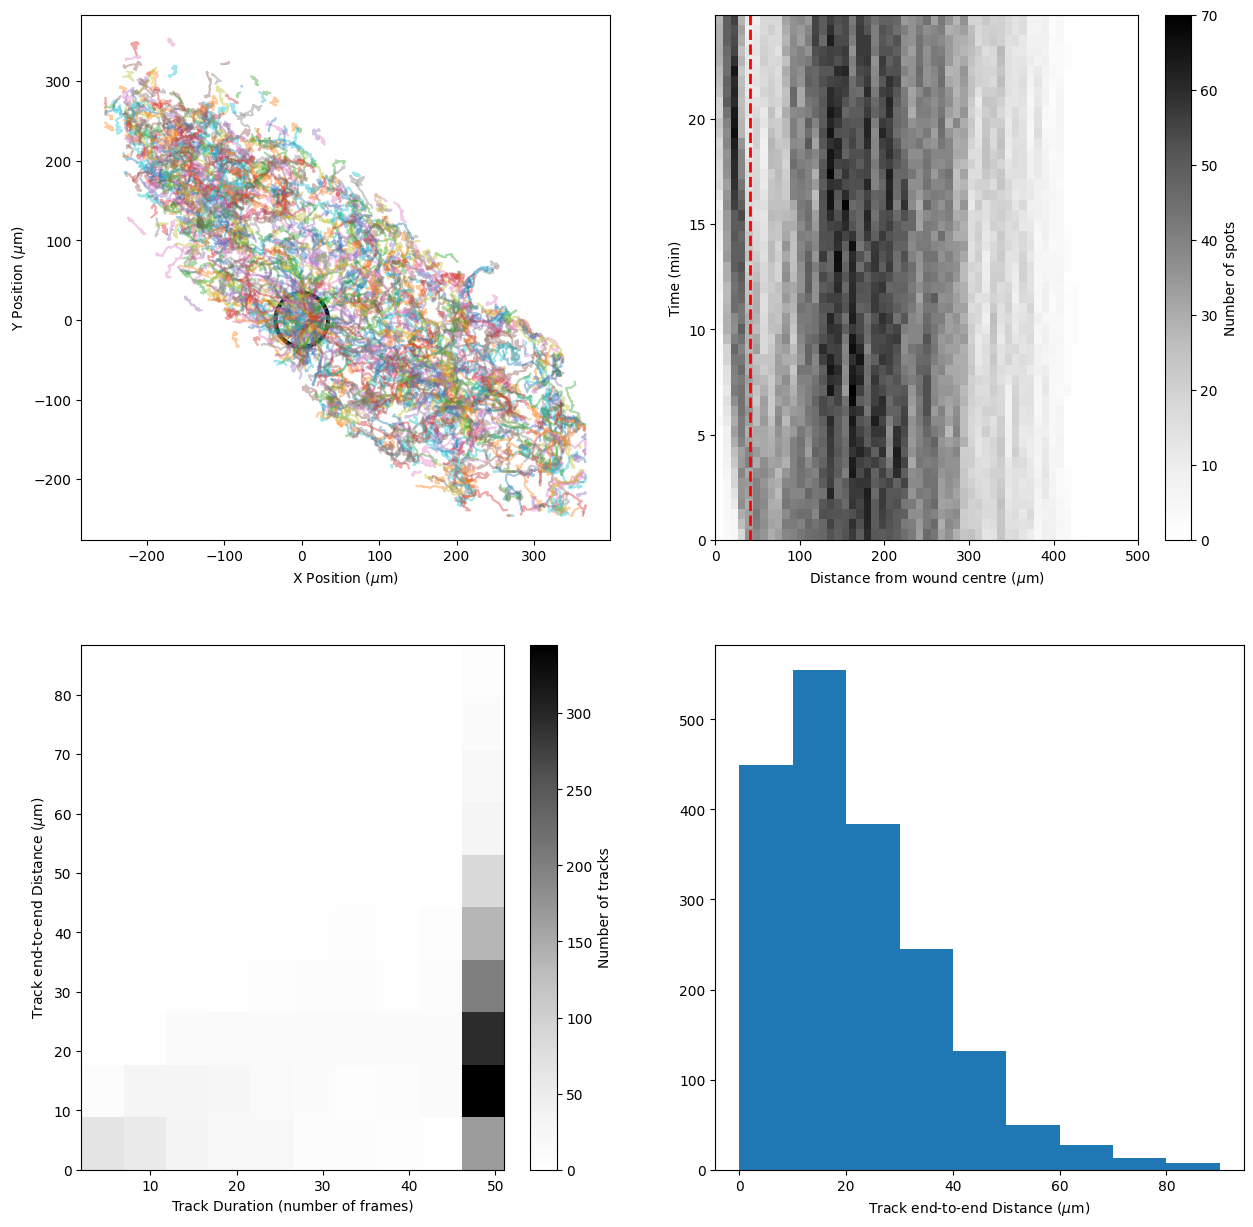

In [32]:
plot_cell_tracks_and_stats(singlewound_control_data,"Control Cell tracking.pdf", woundradius=41)

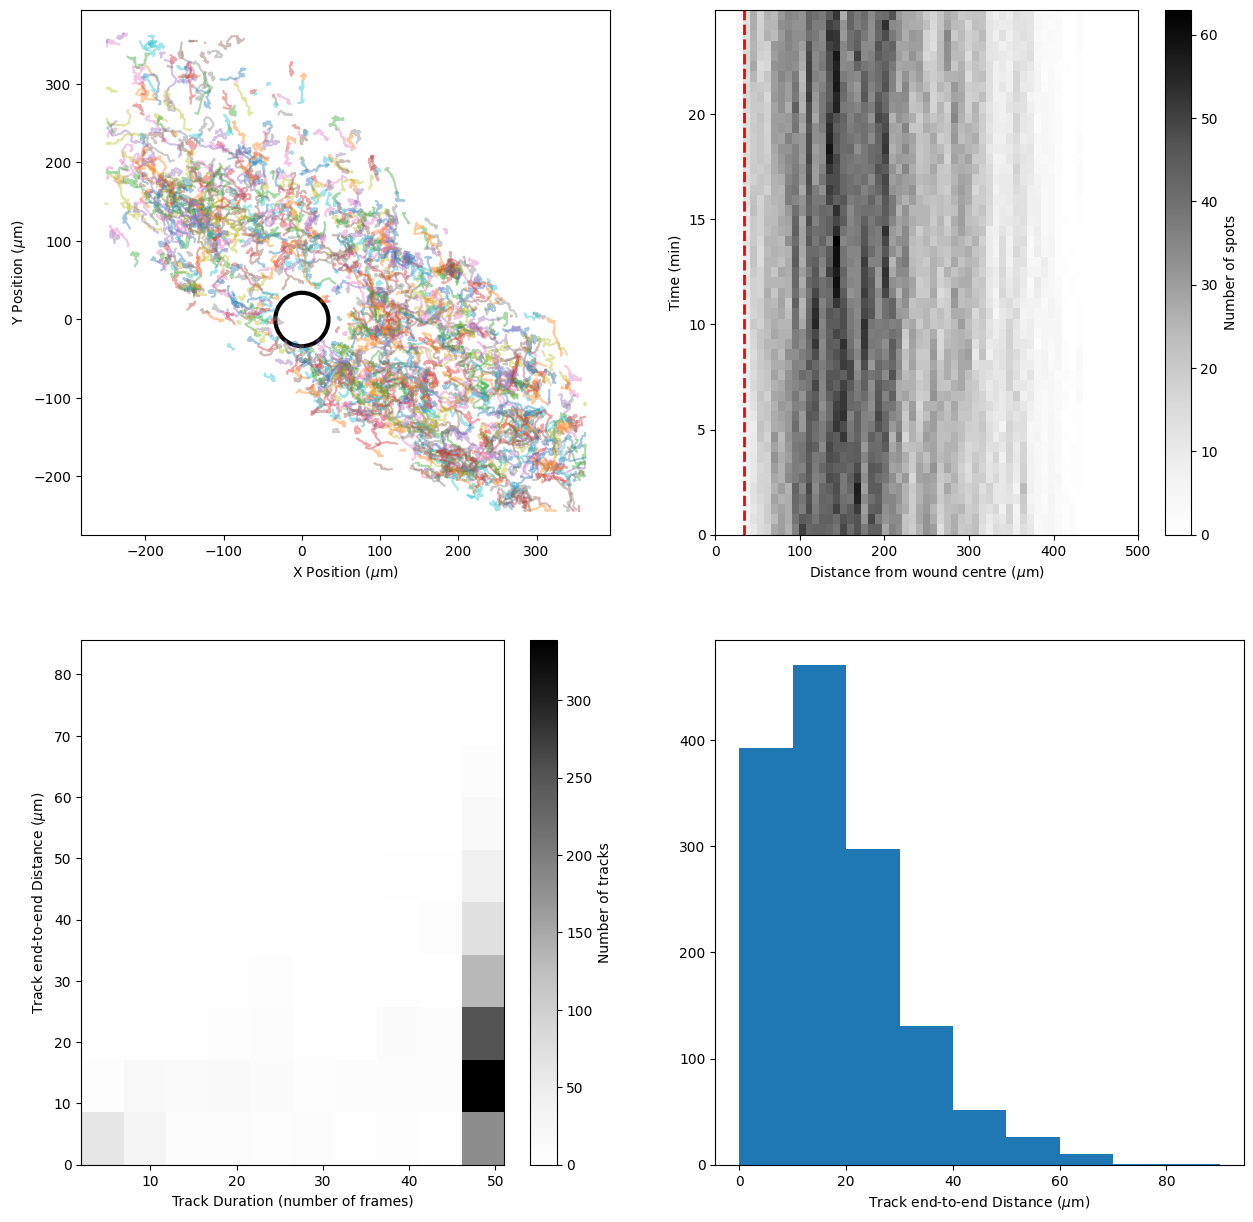

In [33]:
plot_cell_tracks_and_stats(singlewound_mcr_data,"MCR Cell tracking.pdf", woundradius=34)

In [37]:
def angle_binning(trajectory):
        theta_pos = trajectory[(trajectory['theta'] >= 0)]
        theta_neg = trajectory[(trajectory['theta'] < 0)]

        return [theta_pos, theta_neg]

def angle_binning2(trajectory):
        theta_pos = trajectory[(trajectory['theta'] >= np.pi/4) & (trajectory['theta'] <= np.pi*3/4)]
        theta_neg = trajectory[(trajectory['theta'] <= - np.pi/4) & (trajectory['theta'] >= - np.pi*3/4)]

        return [theta_pos, theta_neg]

In [35]:
# bin by angle to exclude tracks where the wound is close to the wing edge
angle_binned_control = angle_binning(singlewound_control_data)
angle_binned_mcr = angle_binning(singlewound_mcr_data)


/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


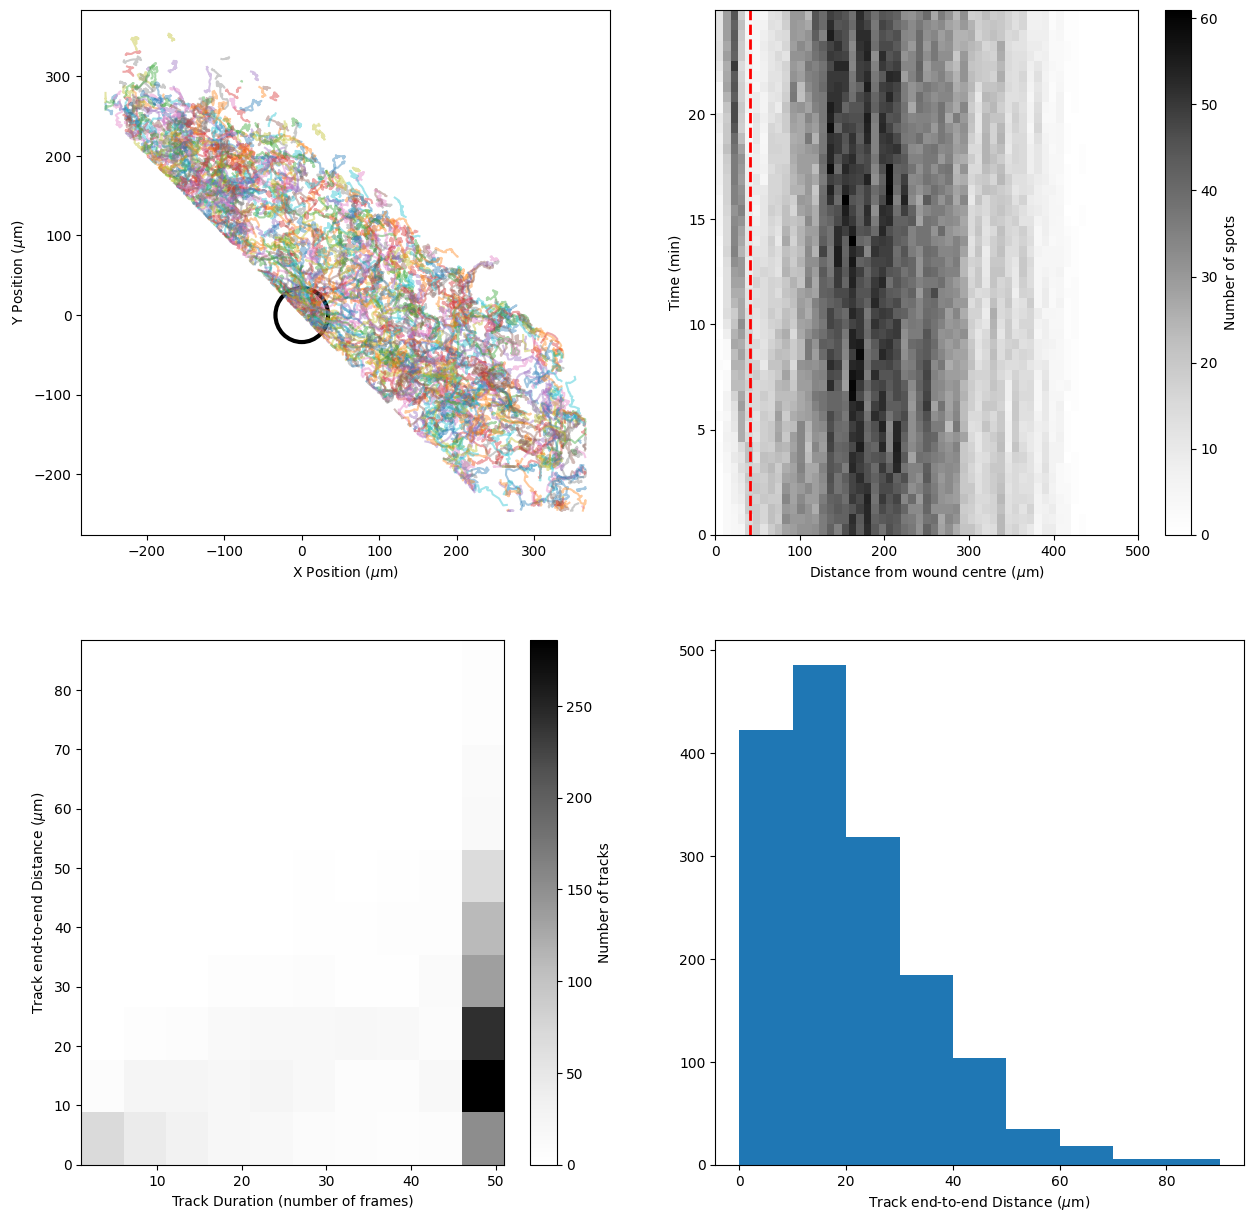

In [36]:
plot_cell_tracks_and_stats(angle_binned_control[0],"Control Cell tracking_exclEdge.pdf", woundradius=41)

/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


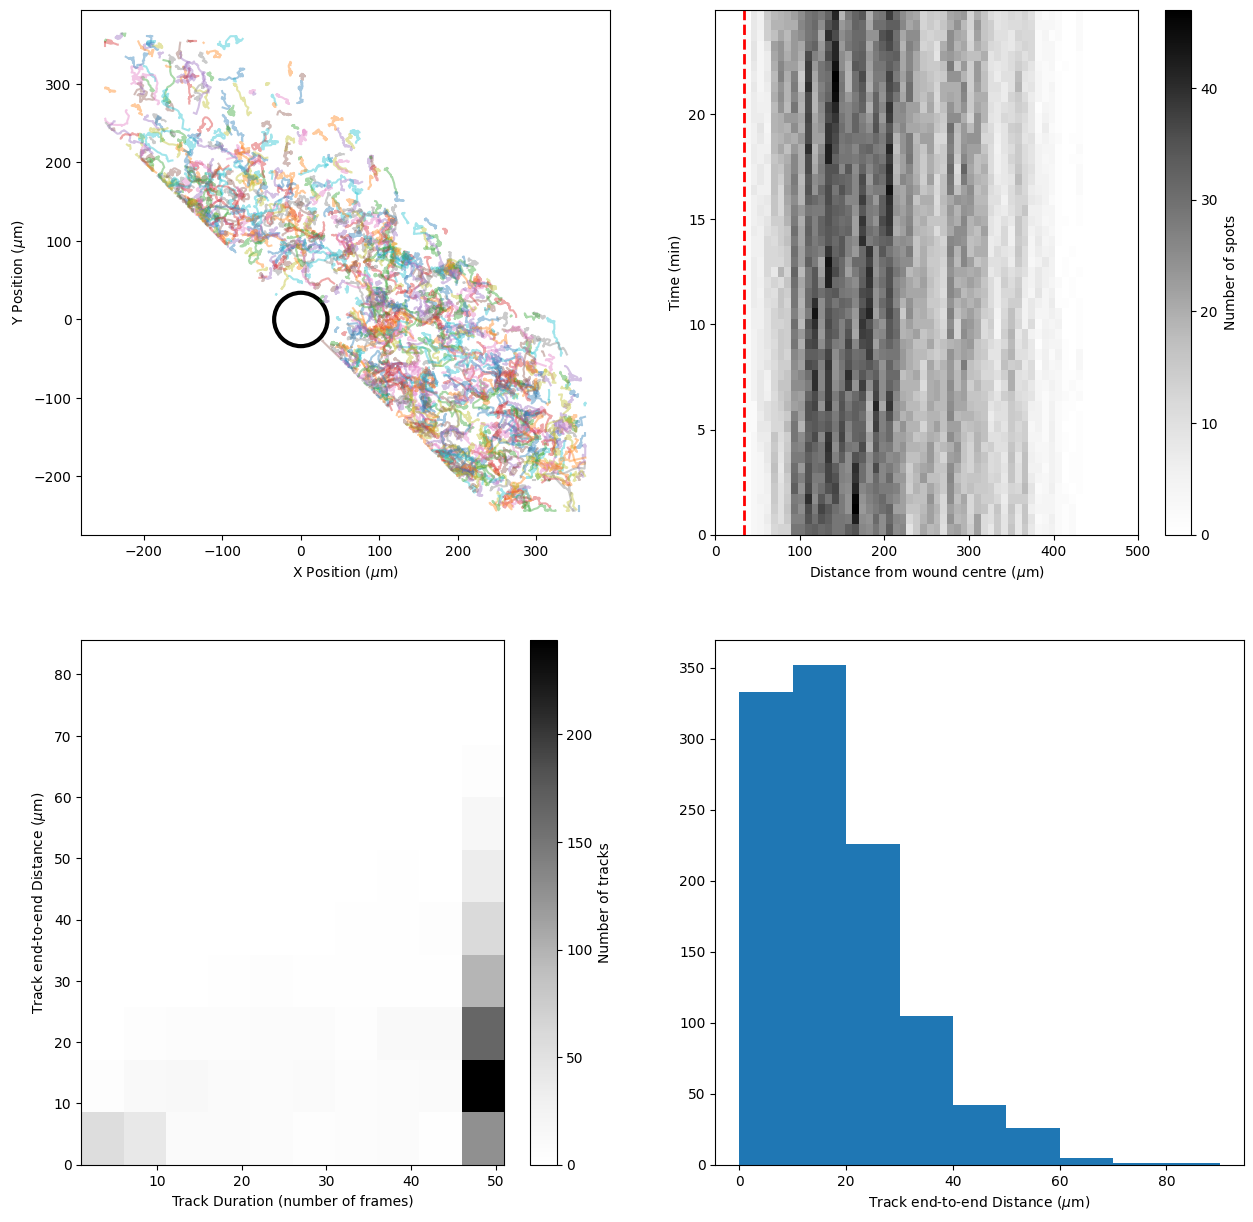

In [38]:
plot_cell_tracks_and_stats(angle_binned_mcr[0],"MCR Cell tracking_exclEdge.pdf", woundradius=34)

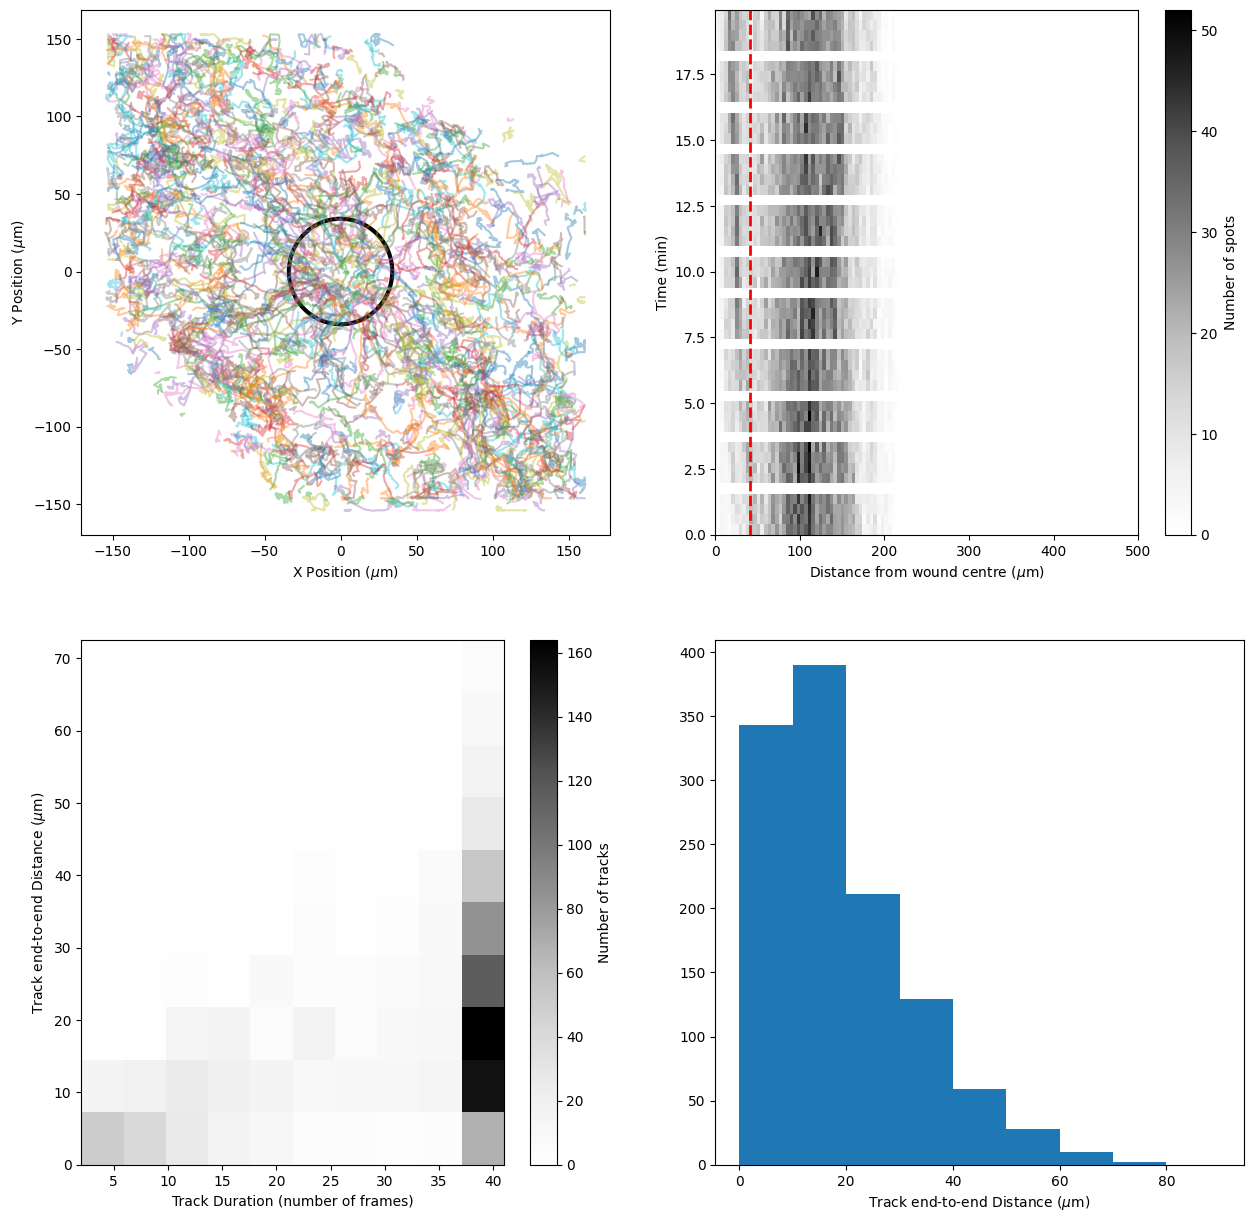

In [49]:
plot_cell_tracks_and_stats(halfwound_control_data,"Halfwound CTR Cell tracking.pdf", woundradius=41)

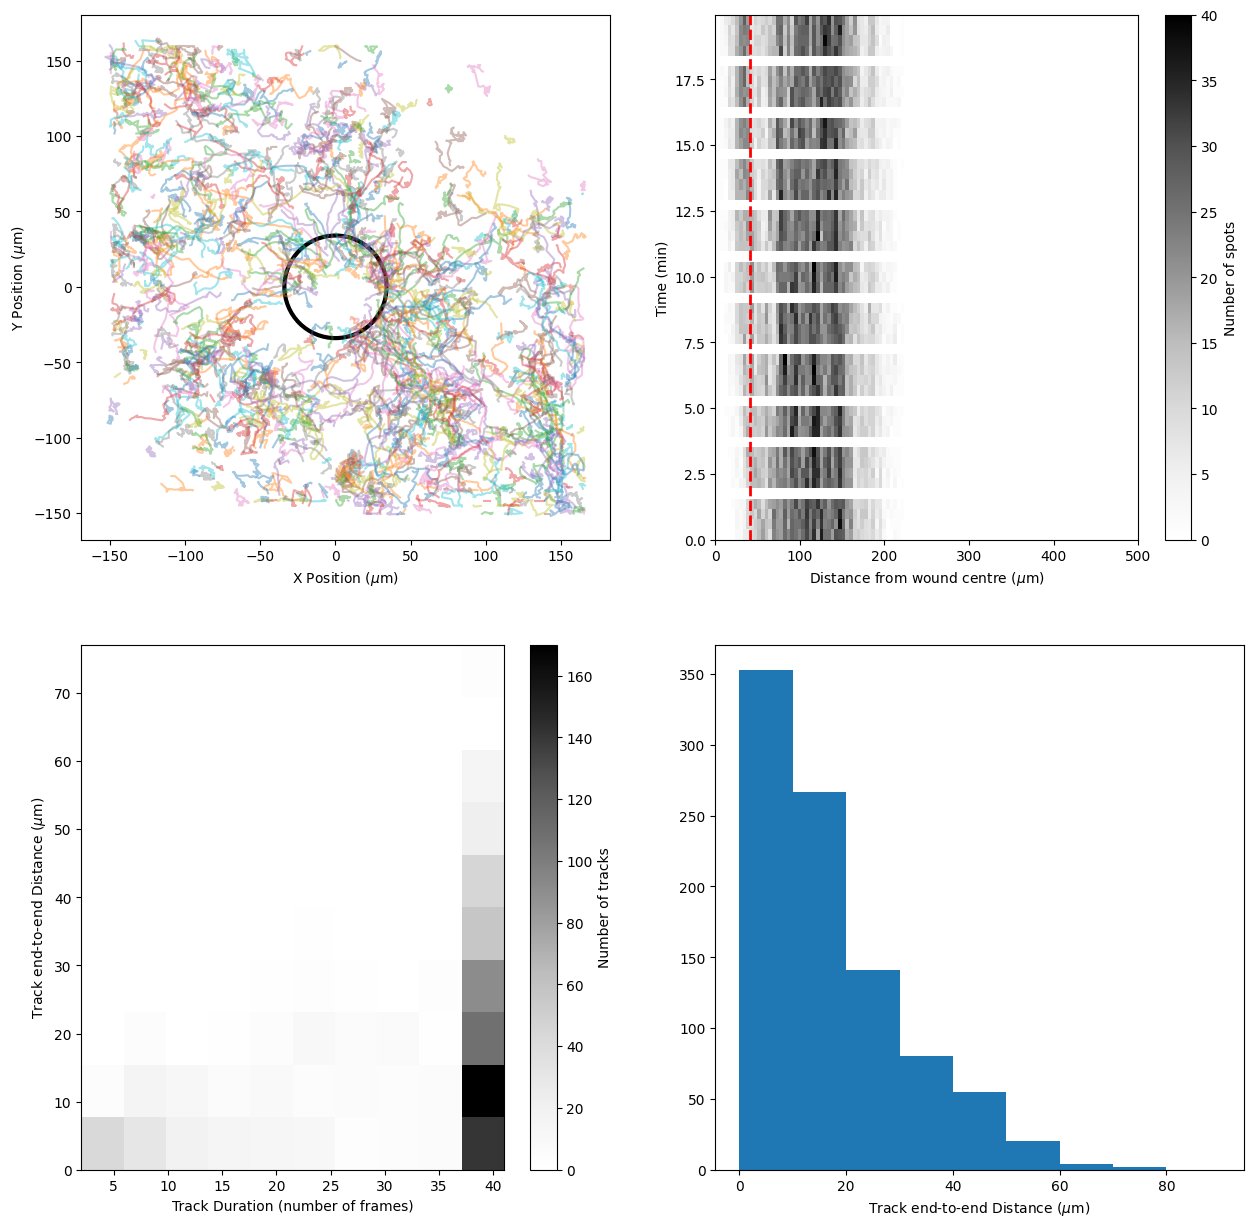

In [50]:

plot_cell_tracks_and_stats(halfwound_mcr_data,"Halfwound MCR Cell tracking.pdf", woundradius=41)

In [51]:
# bin by top and bottom "half"
halfwound_data_control_angle_binned_pi = angle_binning(halfwound_control_data)
halfwound_data_mcr_angle_binned_pi = angle_binning(halfwound_mcr_data)
# bin by top and bottom "quarter"
halfwound_data_control_angle_binned_piby2 = angle_binning2(halfwound_control_data)
halfwound_data_mcr_angle_binned_piby2 = angle_binning2(halfwound_mcr_data)

/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


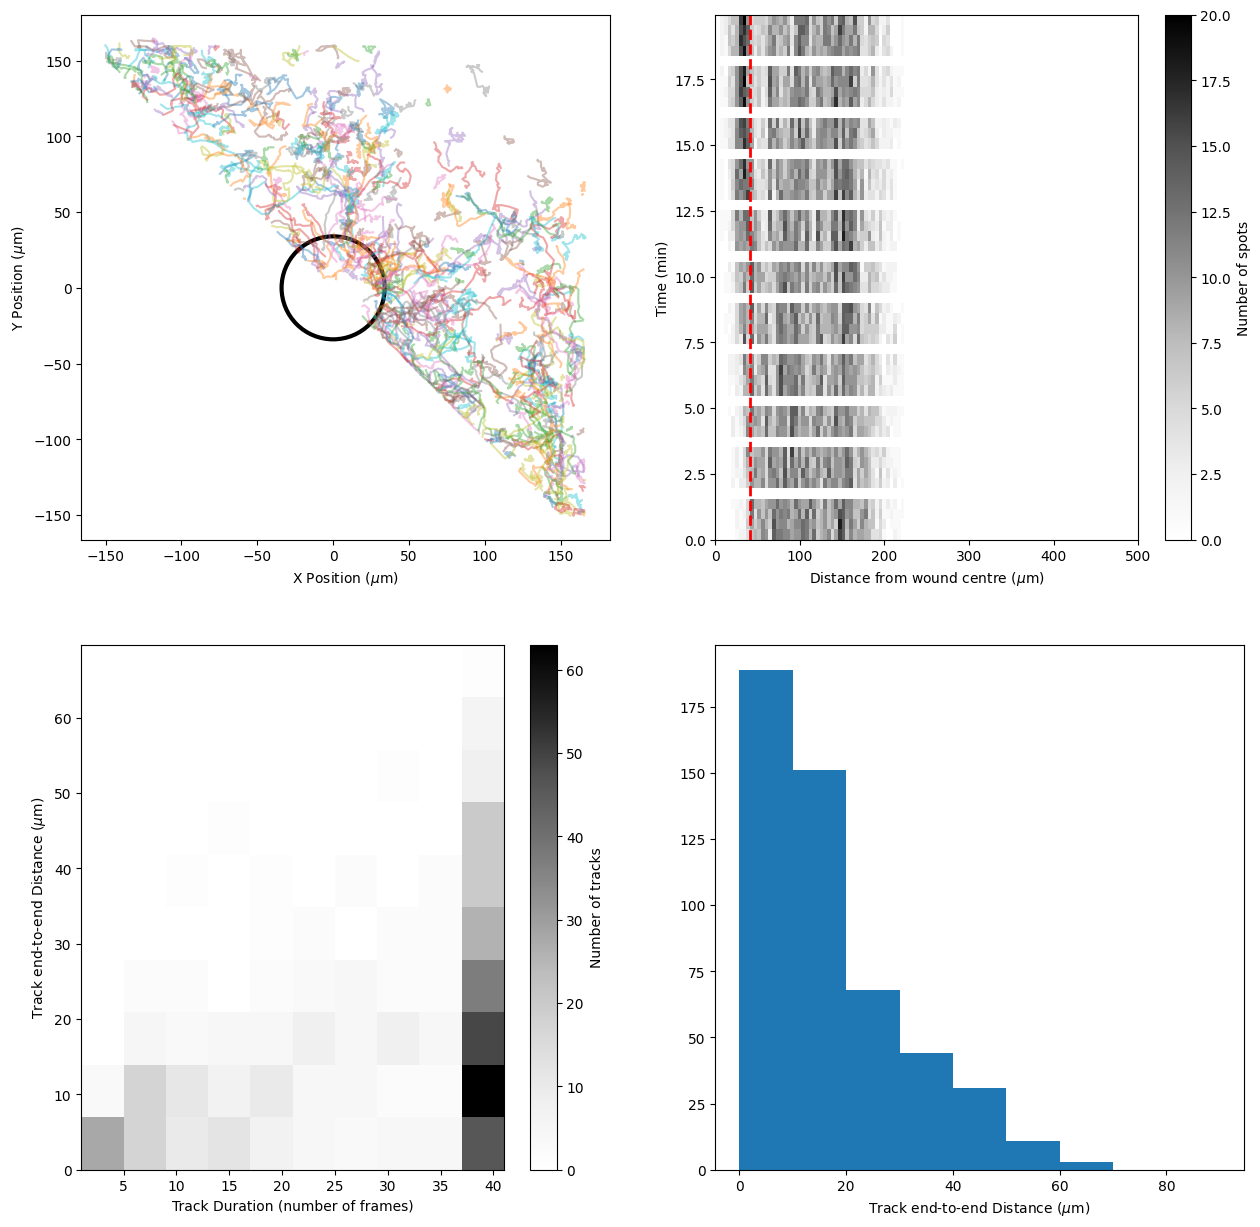

In [52]:
plot_cell_tracks_and_stats(halfwound_data_mcr_angle_binned_pi[0],"Halfwound MCR Cell tracking top half.pdf", woundradius=41)

/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


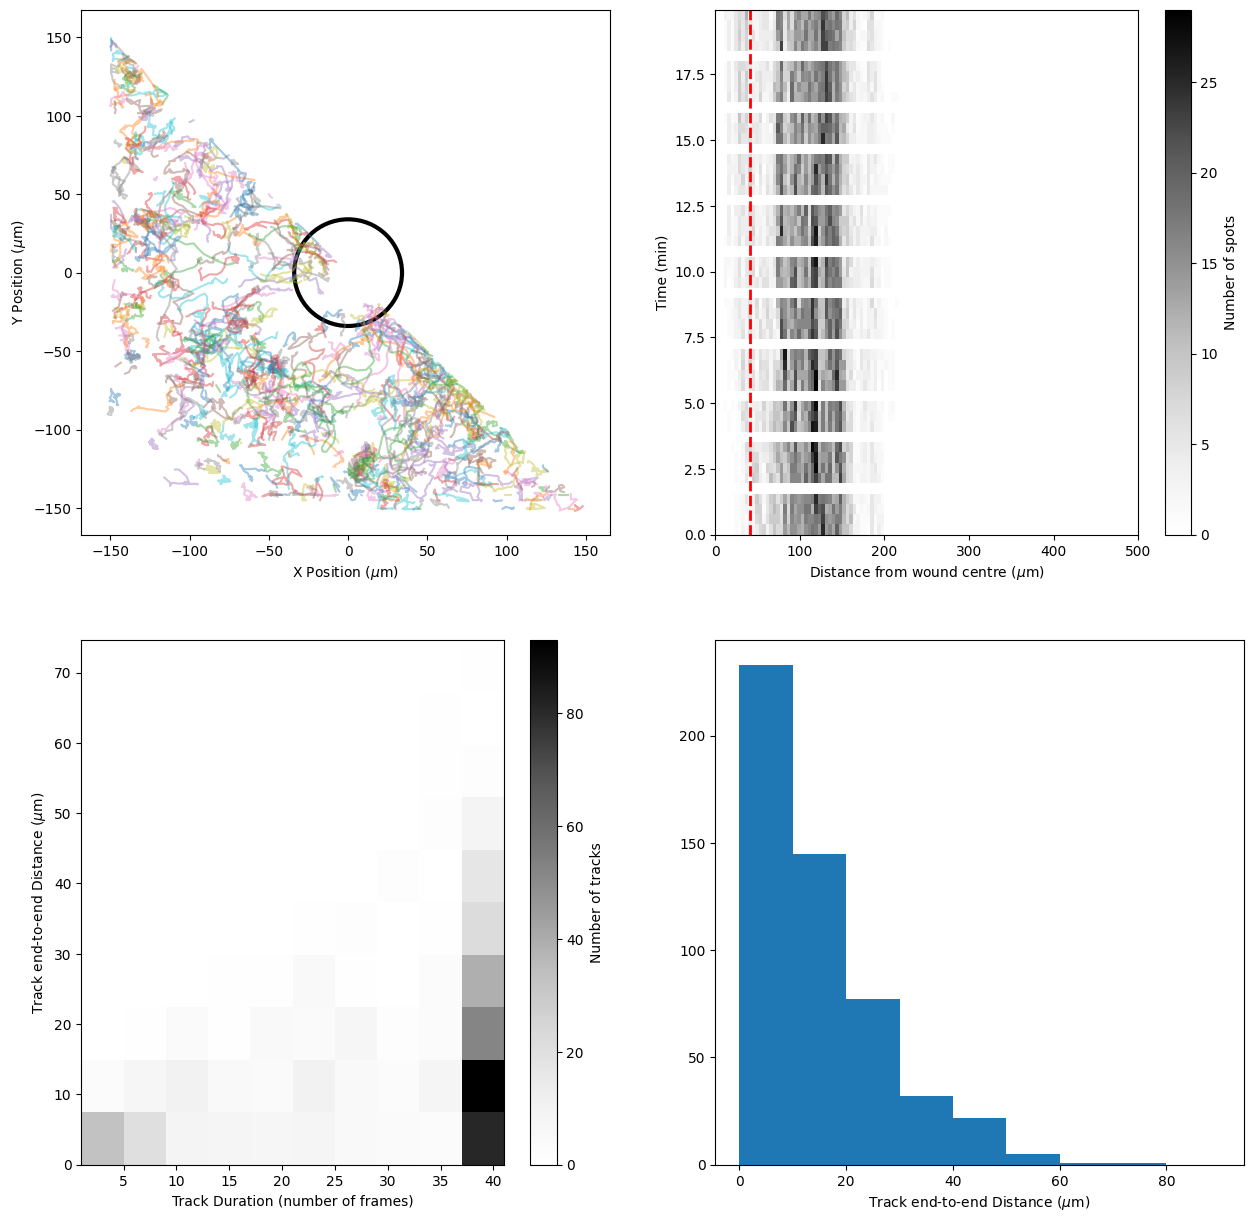

In [53]:
plot_cell_tracks_and_stats(halfwound_data_mcr_angle_binned_pi[1],"Halfwound MCR Cell tracking bottom half.pdf", woundradius=41)

/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


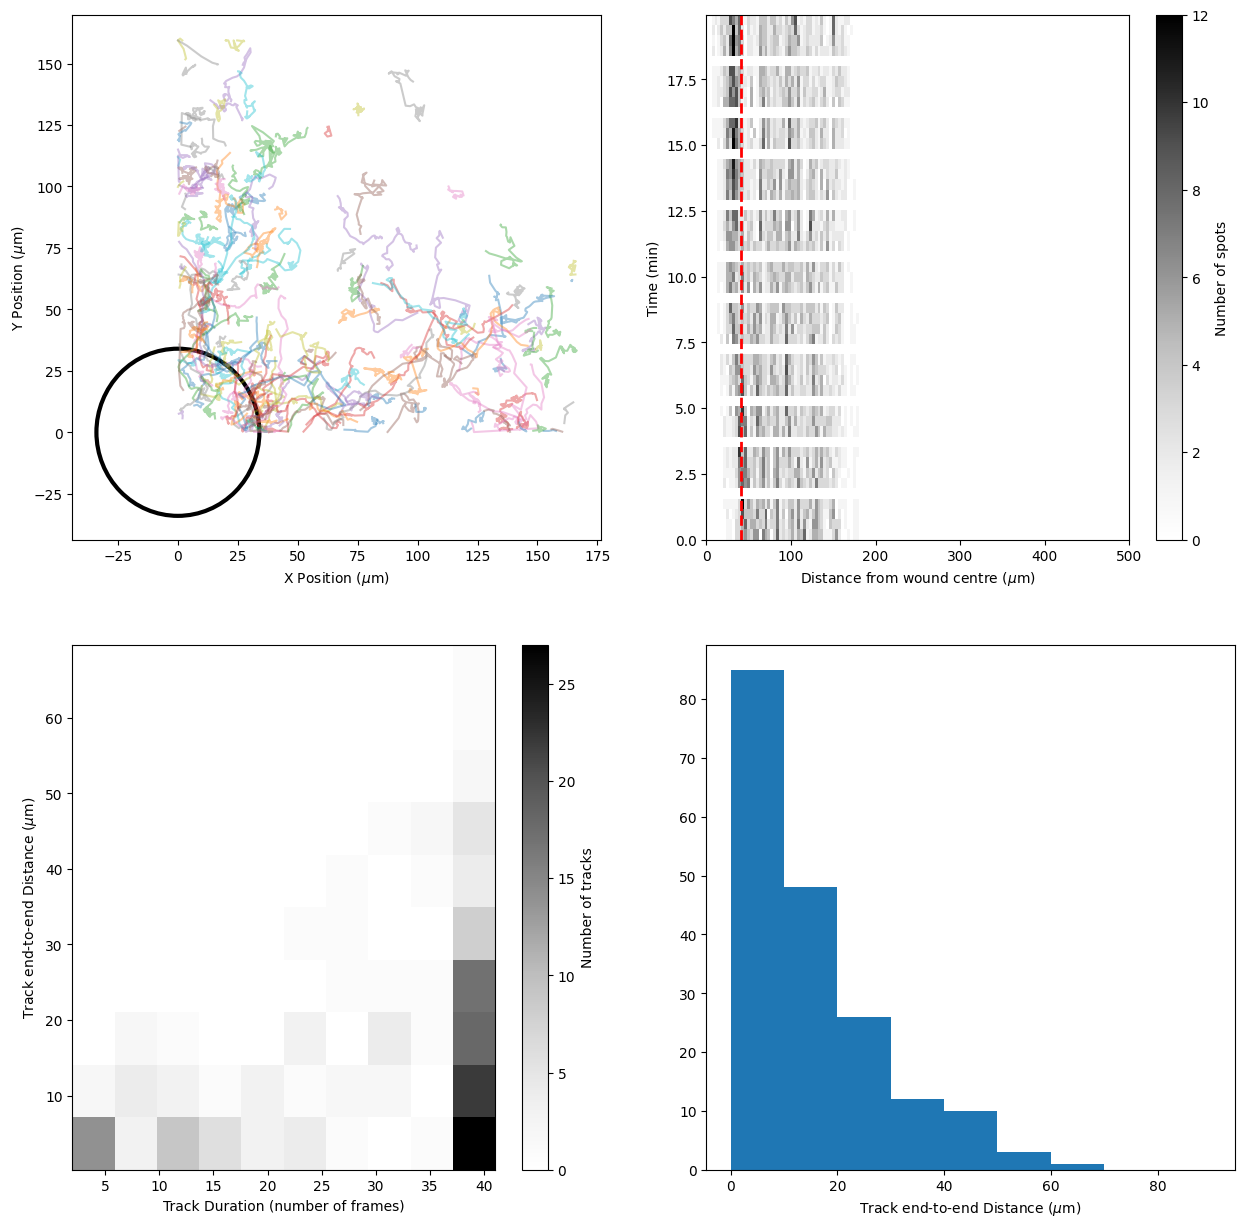

In [54]:
plot_cell_tracks_and_stats(halfwound_data_mcr_angle_binned_piby2[0],"Halfwound MCR Cell tracking top quarter.pdf", woundradius=41)

/var/folders/92/tvn4jggs62qb78rd70twcy7w0000gn/T/ipykernel_90405/517027591.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellTracks['r'] = (lambda x, y: np.sqrt(x ** 2 + y ** 2))(cellTracks['x'], cellTracks['y'])


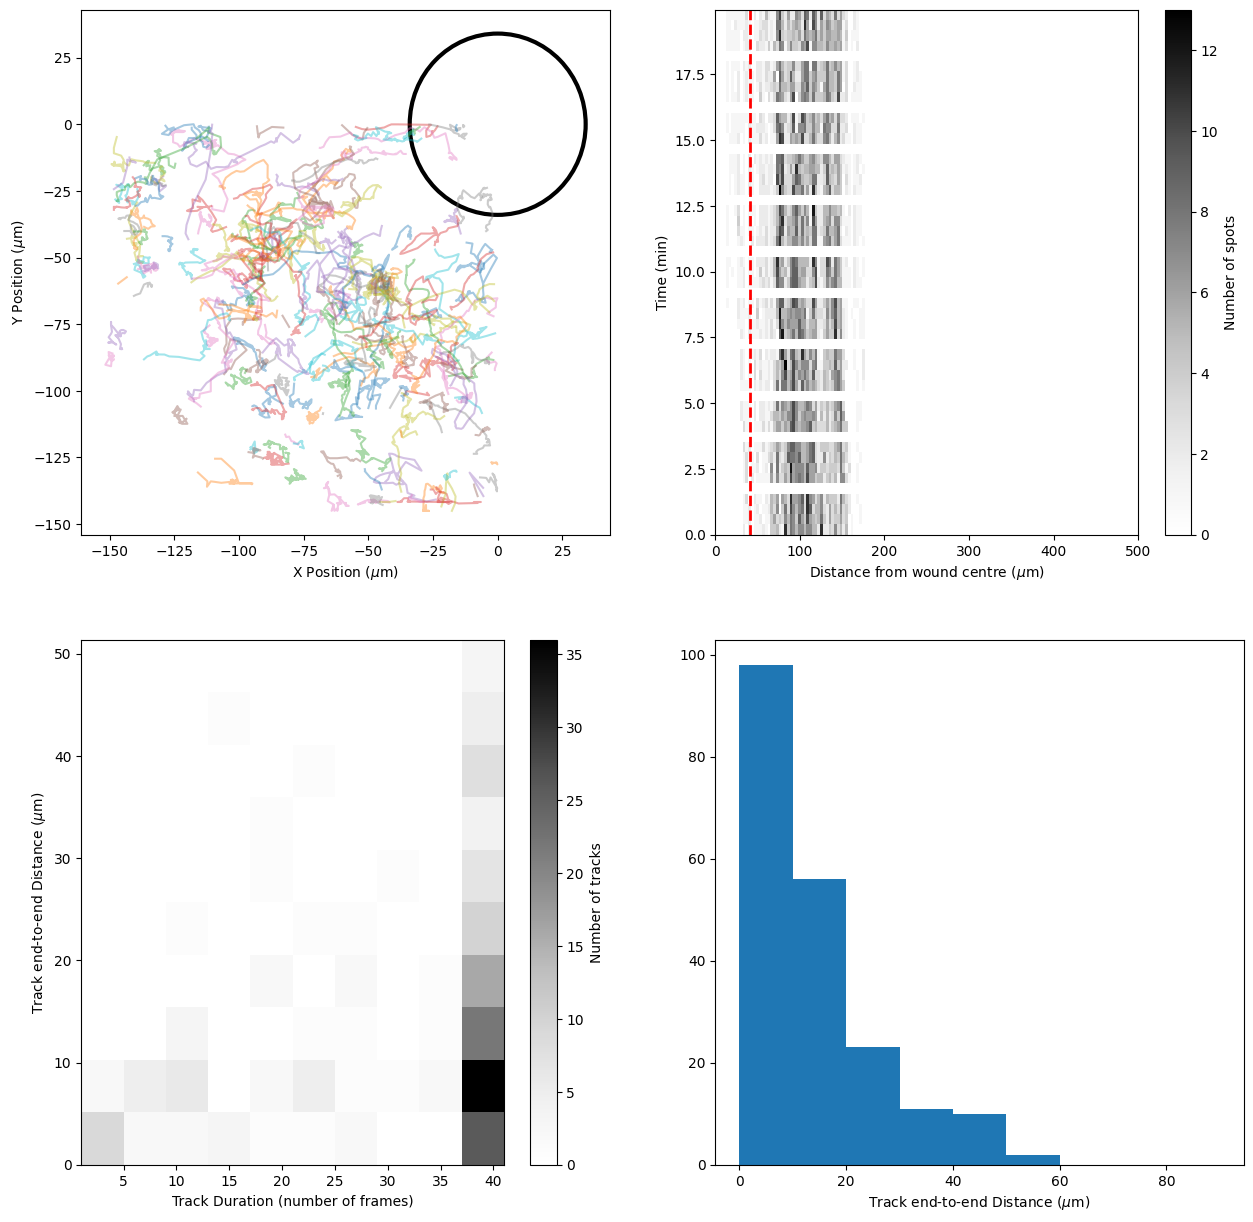

In [55]:
plot_cell_tracks_and_stats(halfwound_data_mcr_angle_binned_piby2[1],"Halfwound MCR Cell tracking bottom quarter.pdf", woundradius=41)